In [41]:
import pandas as pd
import json
import os
import geopandas as gpd
import pysal as ps

import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import matplotlib

medium_font = fm.FontProperties(fname =  "D:/bachelors/datasets/viz/Roboto-Medium.ttf", size = 12)
regluar_font = fm.FontProperties(fname = "D:/bachelors/datasets/viz/Roboto-Regular.ttf", size = 12)

colors = {
    'peach' : '#FCB886',
    'blue' : '#6FC7F7',
    'green' : '#78AF34',
    'red' : '#D25B5B',
    'grey' : '#8B8B8B'
}

os.chdir('D:/bachelors/datasets/')

In [10]:
types = gpd.read_file('analysis/typology/types.gpkg')
hbd_centrality = gpd.read_file('centrality_by_municipality.gpkg')

In [11]:
hbd_centrality.columns

Index(['NAME', 'POPULATION', 'Area', 'DENSITY', 'commune_ok', 'cent_idx_sum',
       'geometry'],
      dtype='object')

In [12]:
comparative_df = types.merge(
    hbd_centrality,
    on = 'NAME',
    how = 'left'
)[['NAME', 'type_main', 'type_score', 'cent_idx_sum']]

In [31]:
def precision(x):
    if x >= 0.9:
        return('_0')
    if x < 0.9 and x >= 0.5:
        return('_1')
    if x < 0.5:
        return('_2')

In [33]:
comparative_df['p'] = comparative_df.type_score.apply(lambda x: precision(x))
comparative_df['type_differentiate'] = comparative_df.type_main + comparative_df.p

In [60]:
bars = comparative_df.groupby('type_differentiate')['cent_idx_sum'].sum().sort_index()

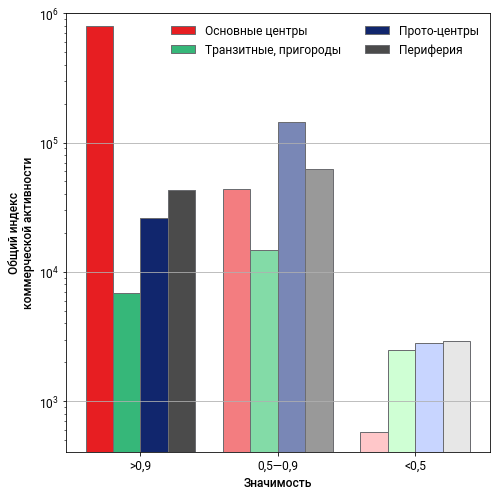

In [127]:
# libraries
import numpy as np

 
# set width of bar
barWidth = 0.2
 
# set height of bar
bars1 = bars[:3]
bars2 = bars[3:6]
bars3 = bars[6:9]
bars4 = bars[9:]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
fig = plt.figure(figsize = (7,7), facecolor = 'w')
# Make the plot
plt.bar(r1, bars1, color=['#E71E22', '#F37D80', '#FFC7C9'], width=barWidth, edgecolor= '#6C6D71', label='Основные центры')
plt.bar(r2, bars2, color=['#36B779', '#83DBA7', '#CFFFD4'], width=barWidth, edgecolor='#6C6D71', label='Транзитные, пригороды')
plt.bar(r3, bars3, color=['#11266D', '#7987B6', '#C8D5FF'], width=barWidth, edgecolor='#6C6D71', label='Прото-центры')
plt.bar(r4, bars4, color=['#4B4B4B', '#999999', '#E7E7E7'], width=barWidth, edgecolor='#6C6D71', label='Периферия')
 
# Add xticks on the middle of the group bars
plt.xlabel('Значимость', fontproperties = medium_font)
plt.ylabel('Общий индекс\nкоммерческой активности', fontproperties = medium_font)
plt.xticks([r + 1.5 * barWidth for r in range(len(bars1))], ['>0,9', '0,5—0,9', '<0,5'], fontproperties = regluar_font)
plt.yscale('log') 
plt.yticks(fontproperties = regluar_font)
# Create legend & Show graphic
plt.grid(axis = 'y')
plt.legend(loc='best', ncol = 2, prop = regluar_font, fontsize = 30, frameon = False)
plt.ylim(top = 10**6)
plt.tight_layout()
plt.savefig('analysis/typology/typoplot_centrality.png', dpi = 192)
plt.show()